In [2]:
import sys
import numpy as np
import logging
import warnings
import tqdm
warnings.filterwarnings("ignore", module="dynesty.sampling")
try:
    import snelib19odp
except ImportError:
    sys.path.append('../lib')

import matplotlib.pyplot as plt
import seaborn
import astropy.table as table

import snelib19odp.dataset as dataset
import snelib19odp.lc.observables as observables
import snelib19odp.dataset as dataset
import snelib19odp.tigerfit as tigerfit
import snelib19odp.utils as utils

In [3]:
ds = dataset.load_dataset('SN2019odp_phot_short')
ds2 = dataset.load_dataset('iPTF13bvn')
ds2.first_detection_mjd

../lib/snelib19odp/dataset.py:483: RuntimeWarning: invalid value encountered in log10
  ds['mag'] = -2.5*np.log10(ds['ampl']) + ds['magzp']
/home/welterde/.local/lib/python3.8/site-packages/astropy/table/row.py:76: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  return self.as_void() == other


       mjd         band   mag   mag_err  maglim telescope instrument
------------------ ---- ------- ------- ------- --------- ----------
58718.171532724984 UVW1 21.1707  0.3498 21.2422     Swift       UVOT
 58718.17296719598    U 20.4926  0.3356 20.6174     Swift       UVOT
58718.173944388516    B 18.9096  0.1832 19.9058     Swift       UVOT
 58718.17632610677 UVW2 22.8054  0.5947 22.0495     Swift       UVOT
 58718.17869199114    V 18.5903  0.2777  18.981     Swift       UVOT
 58718.18644587137 UVM2 22.4146  0.2873 22.7858     Swift       UVOT
58719.476249458734 UVW1 21.2914  0.2713 21.7586     Swift       UVOT
 58719.47768546175    U 20.6638  0.2699  21.086     Swift       UVOT
58719.478660993744    B 18.7056  0.1176 20.3376     Swift       UVOT
 58719.48103849823 UVW2 22.2051  0.3022 22.5072     Swift       UVOT
               ...  ...     ...     ...     ...       ...        ...
 58721.96560227778    U 19.6001  0.1871 20.6589     Swift       UVOT
 58721.96663642116    B 18.0553  0

56459.238

100%|██████████| 300/300 [02:52<00:00,  1.74it/s]


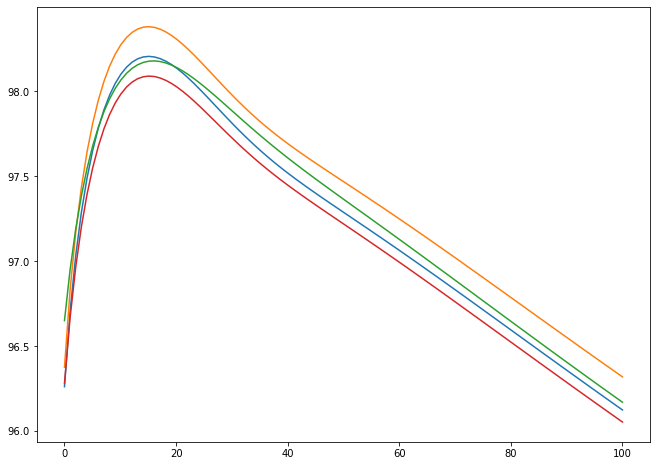

In [4]:
plt.figure(figsize=(11,8))

t_grid = np.linspace(58719, 58719+100, 100)
t_grid_13bvn = np.linspace(56459.3, 56459.3+100, 100)
bolometric_method = 'lyman'

sample_num = 300

mej = np.empty(sample_num)
energy = np.empty(sample_num)
mej_13bvn = np.empty(sample_num)
energy_13bvn = np.empty(sample_num)
texpl = np.random.uniform(58714.5-2, 58714.5+3, size=sample_num)
texpl_13bvn = np.random.uniform(56458.0-5, 56459.0, size=sample_num)

for i in tqdm.tqdm(range(sample_num)):
    lc = ds.sample_abs_lc(method=bolometric_method, t_grid=t_grid)
    lums = utils.convert_luminosity(lc)
    lc = table.Table({'mjd': t_grid, 'luminosity': lums})
    #print(lc)
    fit_results = tigerfit.tigerfit(lc, texpl_mjd=texpl[i])
    mej[i] = fit_results.mej
    energy[i] = fit_results.e
    if i < 4:
        plt.plot(t_grid-58719, fit_results.fitcurve)
    
    lc = ds2.sample_abs_lc(method=bolometric_method, t_grid=t_grid_13bvn)
    
    lums = utils.convert_luminosity(lc)
    lc = table.Table({'mjd': t_grid_13bvn, 'luminosity': lums})
    #print(lc)
    fit_results = tigerfit.tigerfit(lc, texpl_mjd=texpl_13bvn[i])
    mej_13bvn[i] = fit_results.mej
    energy_13bvn[i] = fit_results.e
    
    #plt.plot(t_grid-58719, lums, alpha=0.3)

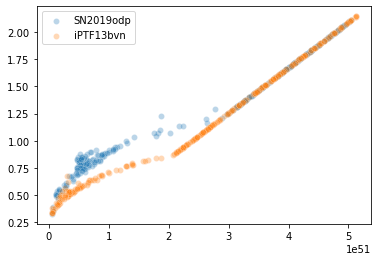

In [5]:
seaborn.scatterplot(x=energy, y=mej, label='SN2019odp', alpha=0.3)
seaborn.scatterplot(x=energy_13bvn, y=mej_13bvn, label='iPTF13bvn', alpha=0.3)
plt.legend()

(array([33., 42., 17., 35., 32., 23., 39., 27., 25., 27.]),
 array([0.33112345, 0.51279218, 0.69446091, 0.87612964, 1.05779837,
        1.2394671 , 1.42113583, 1.60280456, 1.78447329, 1.96614202,
        2.14781075]),
 <BarContainer object of 10 artists>)

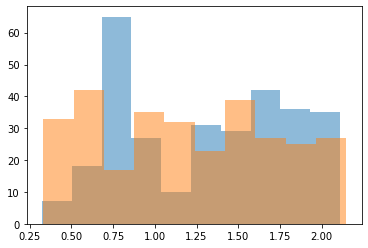

In [6]:
plt.hist(mej, label='SN2019odp', alpha=0.5)
plt.hist(mej_13bvn, label='iPTF13bvn', alpha=0.5)

  5%|▌         | 20/400 [00:04<01:25,  4.47it/s]../lib/snelib19odp/tigerfit.py:59: RuntimeWarning: invalid value encountered in double_scalars
  res = (2.*Mni*Msun/td)*np.exp(-((x/td)**2+(2.*r0*r15*x/(vej*kms2cms*(td**2)*day))))* \
 14%|█▎        | 54/400 [00:12<01:20,  4.32it/s]../lib/snelib19odp/tigerfit.py:59: RuntimeWarning: invalid value encountered in double_scalars
  res = (2.*Mni*Msun/td)*np.exp(-((x/td)**2+(2.*r0*r15*x/(vej*kms2cms*(td**2)*day))))* \
 23%|██▎       | 92/400 [00:21<01:09,  4.45it/s]../lib/snelib19odp/tigerfit.py:59: RuntimeWarning: invalid value encountered in double_scalars
  res = (2.*Mni*Msun/td)*np.exp(-((x/td)**2+(2.*r0*r15*x/(vej*kms2cms*(td**2)*day))))* \
 81%|████████  | 323/400 [01:16<00:15,  4.83it/s]../lib/snelib19odp/tigerfit.py:59: RuntimeWarning: invalid value encountered in double_scalars
  res = (2.*Mni*Msun/td)*np.exp(-((x/td)**2+(2.*r0*r15*x/(vej*kms2cms*(td**2)*day))))* \
100%|██████████| 400/400 [01:34<00:00,  4.25it/s]


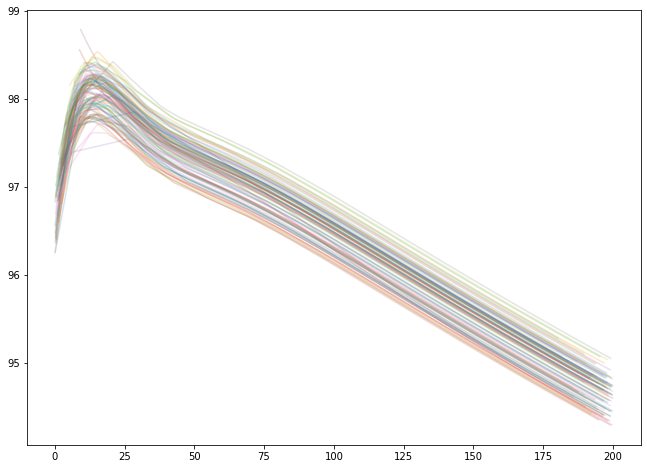

In [7]:
plt.figure(figsize=(11,8))

bolometric_method = 'lyman'

sample_num = 400

mej = np.empty(sample_num)
energy = np.empty(sample_num)
texpl = np.random.uniform(58714.5-2, 58714.5+3, size=sample_num)
fits = []
vej = np.empty(sample_num)

for i in tqdm.tqdm(range(sample_num)):
    
    #print(lc)
    fit_results = None
    while fit_results is None:
        try:
            t_grid = np.sort(np.random.uniform(58719, 58719+200, 40))
            if np.count_nonzero(t_grid < 58735) < 4 or np.count_nonzero(t_grid > 58735) < 4:
                continue
            lc = ds.sample_abs_lc(method=bolometric_method, t_grid=t_grid)
            lums = utils.convert_luminosity(lc)
            lc = table.Table({'mjd': t_grid, 'luminosity': lums})
            fit_results = tigerfit.tigerfit(lc, texpl_mjd=texpl[i])
        except RuntimeError:
            continue
    mej[i] = fit_results.mej
    energy[i] = fit_results.e
    if i % 4 == 0:
        plt.plot(t_grid-58719, fit_results.fitcurve, alpha=0.2)
    fits.append(fit_results)
    vej[i] = fit_results.params[3]
    
    #plt.plot(t_grid-58719, lums, alpha=0.3)

<AxesSubplot:>

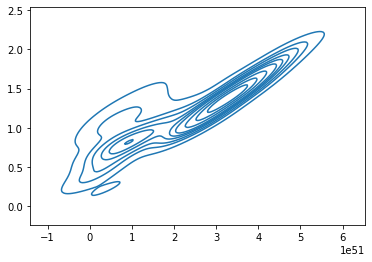

In [8]:
seaborn.kdeplot(x=energy, y=mej)

<AxesSubplot:>

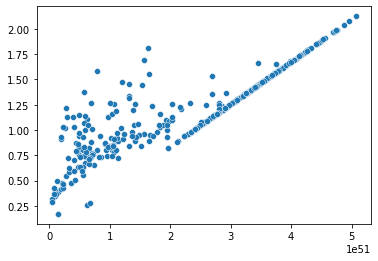

In [9]:
seaborn.scatterplot(x=energy, y=mej)

<AxesSubplot:ylabel='Count'>

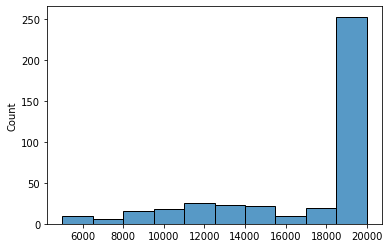

In [10]:
seaborn.histplot(vej)

<AxesSubplot:>

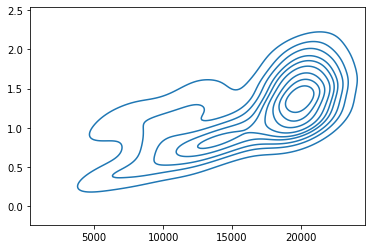

In [11]:
seaborn.kdeplot(x=vej, y=mej)

100%|██████████| 400/400 [01:50<00:00,  3.61it/s]


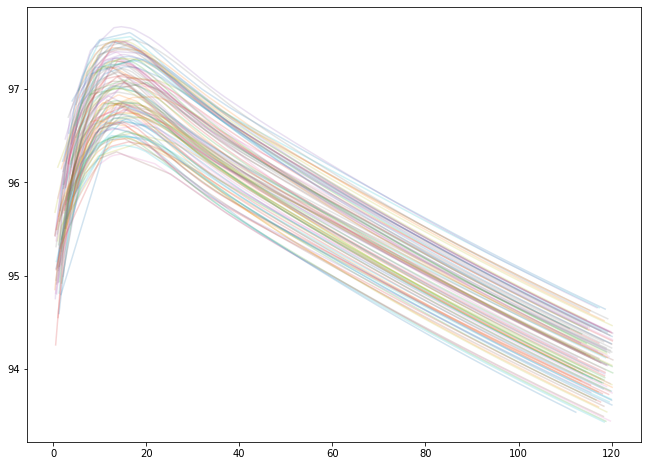

In [12]:
plt.figure(figsize=(11,8))

bolometric_method = 'lyman'

sample_num = 400

mej = np.empty(sample_num)
energy = np.empty(sample_num)
texpl = np.random.uniform(56458.0-5, 56459.0, size=sample_num)
fits = []
vej = np.empty(sample_num)

for i in tqdm.tqdm(range(sample_num)):
    
    #print(lc)
    fit_results = None
    while fit_results is None:
        try:
            #np.linspace(56459.3, 56459.3+100, 100)
            t_grid = np.sort(np.random.uniform(56459.3, 56459.3+120, 40))
            #if np.count_nonzero(t_grid < 58735) < 4 or np.count_nonzero(t_grid > 58735) < 4:
            #    continue
            lc = ds2.sample_abs_lc(method=bolometric_method, t_grid=t_grid)
            lums = utils.convert_luminosity(lc)
            lc = table.Table({'mjd': t_grid, 'luminosity': lums})
            fit_results = tigerfit.tigerfit(lc, texpl_mjd=texpl[i])
        except RuntimeError:
            continue
    mej[i] = fit_results.mej
    energy[i] = fit_results.e
    if i % 4 == 0:
        plt.plot(t_grid-56459.0, fit_results.fitcurve, alpha=0.2)
    fits.append(fit_results)
    vej[i] = fit_results.params[3]
    
    #plt.plot(t_grid-58719, lums, alpha=0.3)

<AxesSubplot:>

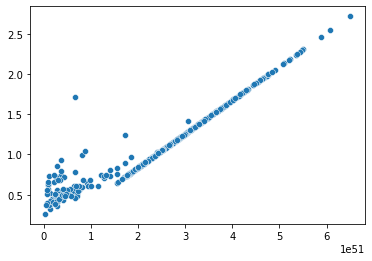

In [13]:
seaborn.scatterplot(x=energy, y=mej)

<AxesSubplot:ylabel='Density'>

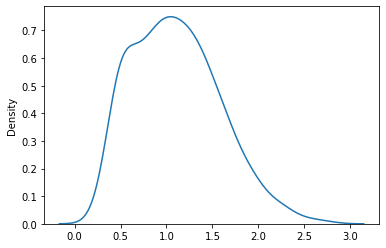

In [14]:
seaborn.kdeplot(mej)